In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [5]:
df=pd.read_csv("logRegData.csv")
truesLin=df["Real_LogReg"]
predsLin=df["Pred_LogReg"]

df=pd.read_csv("4LayerNNData.csv")
truesNN=df["Real_4NN"]
predsNN=df["Pred_4NN"]

df=pd.read_csv("LGBMData.csv")
truesLGBM=df["Real_4NN"]
predsLGBM=df["Pred_4NN"]

In [6]:
predsNN

0       7.688530e-03
1       3.769367e-04
2       9.902901e-01
3       1.537188e-02
4       3.359597e-01
5       5.098419e-01
6       1.481047e-05
7       1.402004e-09
8       6.004529e-01
9       1.258280e-01
10      1.600172e-02
11      4.169209e-05
12      6.749805e-01
13      4.653835e-05
14      3.032198e-02
15      4.527759e-03
16      7.367098e-05
17      2.811894e-02
18      6.830098e-01
19      2.010245e-03
20      2.229832e-01
21      3.199190e-04
22      4.009992e-03
23      2.871161e-04
24      2.216113e-01
25      3.467328e-03
26      1.858088e-03
27      1.483324e-01
28      3.620883e-02
29      3.702285e-03
            ...     
3763    1.597957e-01
3764    8.916223e-01
3765    3.672730e-02
3766    1.241244e-03
3767    4.338027e-02
3768    5.545265e-01
3769    2.319425e-01
3770    1.535644e-02
3771    7.888073e-01
3772    2.215469e-02
3773    2.243459e-02
3774    5.229585e-01
3775    8.716741e-01
3776    4.582433e-06
3777    6.221887e-01
3778    9.474224e-01
3779    1.901

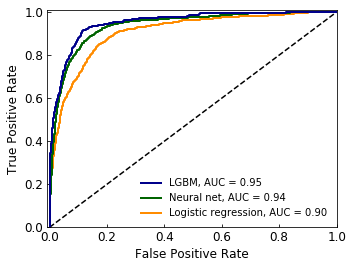

In [65]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr_Lin, tpr_Lin, threshold = metrics.roc_curve(truesLin, predsLin)
roc_auc_Lin = metrics.auc(fpr_Lin, tpr_Lin)

fpr_NN, tpr_NN, threshold = metrics.roc_curve(truesNN, predsNN)
roc_auc_NN = metrics.auc(fpr_NN, tpr_NN)

fpr_LGBM, tpr_LGBM, threshold = metrics.roc_curve(truesLGBM, predsLGBM)
roc_auc_LGBM = metrics.auc(fpr_LGBM, tpr_LGBM)

plt.plot(fpr_LGBM, tpr_LGBM, 'darkblue', label = 'LGBM, AUC = %0.2f' % roc_auc_LGBM, linewidth=2,zorder=20)
plt.plot(fpr_NN, tpr_NN, 'darkgreen', label = 'Neural net, AUC = %0.2f' % roc_auc_NN, linewidth=2,zorder=10)
plt.plot(fpr_Lin, tpr_Lin,'darkorange', label = 'Logistic regression, AUC = %0.2f' % roc_auc_Lin, linewidth=2)

plt.plot([0, 1], [0, 1],'--',c='black')

plt.legend(loc = 'best',frameon = False,fontsize=10)

plt.xlim([-.01, 1.])
plt.ylim([0., 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.tick_params(direction='in')
#plt.xticks([-0.01,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])
#plt.yticks([0.0,0.2,0.4,0.6,0.8,1.01],[0.0,0.2,0.4,0.6,0.8,1.0])
plt.rc('xtick',labelsize=12)
plt.rc('axes',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.gca().set_aspect(0.75)

#plt.show()
plt.savefig('ROC_binary.pdf',dpi=300,bbox_inches='tight')